In [1]:
import os
os.chdir("/Users/jacksonwalters/Documents/GitHub/enefit-kaggle/predict-energy-behavior-of-prosumers/")
!ls

client.csv                            gas_prices.csv
county_id_to_name_map.json            historical_weather.csv
electricity_prices.csv                public_timeseries_testing_util.py
enefit                                train.csv
example_test_files                    weather_station_to_county_mapping.csv
forecast_weather.csv


In [23]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [59]:
#load the model using the legacy .h5 save method
dnn_model = tf.keras.models.load_model('../models/dnn_model.h5')

In [58]:
#load the model
#dnn_model = tf.keras.models.load_model('../models/dnn_model.keras')

ValueError: Layer 'normalization_2' expected 3 variables, but received 0 variables during loading. Expected: ['normalization_2/mean:0', 'normalization_2/variance:0', 'normalization_2/count:0']

In [33]:
#import pickle
#dnn_model = pickle.load(open('../models/dnn_model.sav', 'rb'))

In [60]:
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 23)                47        
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 64)                1536      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5808 (22.69 KB)
Trainable params: 5761 (22.50 KB)
Non-trainable params: 47 (192.00 Byte)
_________________________________________________________________


In [25]:
from load_data import merged_df

In [26]:
df = merged_df()

loading train data...
loading gas_prices...
loading electricity_prices...
loading forecast_weather...
merging train and gas_prices...
merging electricity_prices...
merging forecast_weather...


In [61]:
predict_df = np.array(df[:100_000].copy().drop(columns=['target']))

In [62]:
predictions = dnn_model.predict(predict_df)

3125/3125 [==============================] - 5s 2ms/step


In [37]:
import matplotlib.pyplot as plt

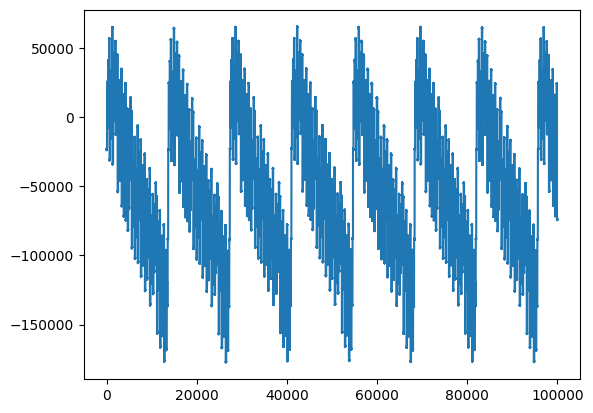

In [63]:
plt.plot(predictions)

(array([ 3920.,  3150., 13431., 10859., 17217., 14133., 14132., 11519.,
         7014.,  4625.]),
 array([-177359.140625  , -153072.859375  , -128786.5859375 ,
        -104500.3125    ,  -80214.03125   ,  -55927.7578125 ,
         -31641.48046875,   -7355.20458984,   16931.07226562,
          41217.34765625,   65503.625     ]),
 <BarContainer object of 10 artists>)

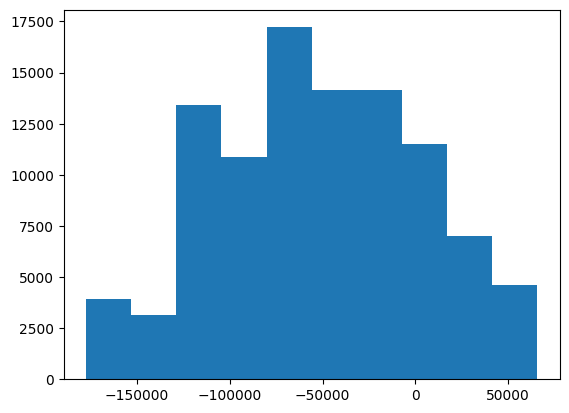

In [64]:
plt.hist(predictions)